# Stats and Public Health deliverable - Part 2

#### Author: Amirhossein Kiani
#### Contact: amkoxia@gmail.com
#### Date: 06/12/2023

### Introduction

We explore West Nile Virus and the relationship between various variables in the relevant dataset.

### Table of Contents

- [Part 0 - Importing libraries and exploring the data set](#part-0)
- [Part 1 - Basic Analysis](#part-1)
- [Part 2 - Statistical Analysis](#part-2)
- [Part 2 - Advanced Statistical Analysis](#part-3)

# Part 0 - Importing libraries and exploring the data set <a class ='author' id='part-0'></a>

First let's import the relevant libraries that will be used later on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr

import statsmodels.api as sm

In [2]:
df = pd.read_csv('mosquito_data_part_2.csv')

In [3]:
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [4]:
# Double-checking all null values are gone, as we were told.
df.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

In [5]:
# Checking out data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [6]:
#Checking some basic statsitics
df.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


# Part 1 - Basic Analysis <a class ='author' id='part-1'></a>

## 1.1. Convert the `WNV Present` column into a binary column and create dummy variables from the `Trap type` column.


In [7]:
# Converting the `WNV Present` column into a binary column, using .map()
df['WNV Present'] = df['WNV Present'].map({'negative': 0, 'positive': 1})

In [8]:
df['WNV Present']

0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present, Length: 18495, dtype: int64

In [10]:
# Creating dummy variables for df['Trap type']
# I drop the first column since the four trap types are mutually exclusive.

traptype = pd.get_dummies(df['Trap type'],drop_first=True)
traptype = traptype.astype(int)
traptype

# Alternatively, we could do this: traptype = pd.get_dummies(df['Trap type']).astype('int')

,GRAVID,OVI,SENTINEL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18490,1,0,0
18491,1,0,0
18492,1,0,0
18493,0,0,1


**Note**: Although we're not asked this, we could now integrate `df_traptype` into df by replacing it with the original column. We will do this later.

### 2. What is the average number of mosquitoes for each month? What trends do you notice?


In [11]:
# We can use groupby() and mean over the 'Mosquito number' column:

df.groupby(['Month']).mean('Mosquito number')['Mosquito number']

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

As we can see, summer months display higher averages in the number of mosquitoes. We can display this by the following graph, as well:

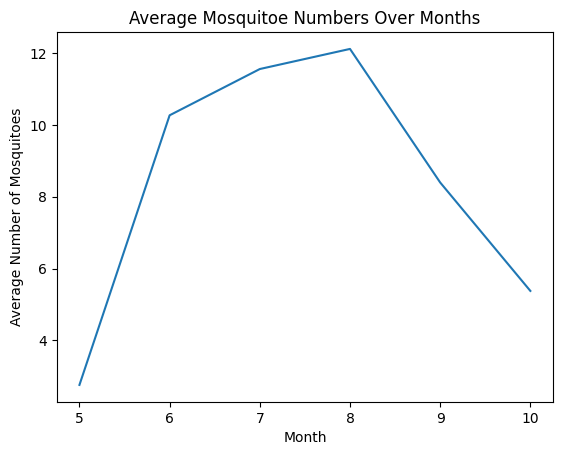

In [13]:
df.groupby(['Month']).mean('Mosquito number')['Mosquito number'].plot()
plt.title('Average Mosquitoe Numbers Over Months')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitoes')
plt.show()

# Part 2 - Statistical Analysis <a class ='author' id='part-2'></a>

## 2.1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?



To asses this, we use Chi-Squared hypothesis test, since we're working with categorical data (`Species`) and the prevalence of WNV viruses among them. Our null and alternative hypotheses are as follows:

* $H_0$: The occurence of the WNV is equally ditributed accross all different mosquitio species.
* $H_1$: The occurence of the WNV is not equally ditributed accross all different mosquitio species.

We can reject $H_0$ only if our tests statsitics suggests so, that is, the p-value of the contingency table of insect species and the presence of WNV in them is less than 5%.

We first create a contingency table for our relevant data:

In [13]:
contingency_df = df.groupby(['Species', 'WNV Present']).count()['Mosquito number'].unstack()
contingency_df

# We could obtain the same table using the following: 
# pd.crosstab(df['Species'], df['WNV Present'])

WNV Present,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


Now we apply the chi2_contingency() function to this table:

In [14]:
stats.chi2_contingency(contingency_df)

(311.10394683130164,
 3.9302341764409087e-67,
 3,
 array([[4301.29689105, 1184.70310895],
        [9303.5342525 , 2562.4657475 ],
        [ 177.19524196,   48.80475804],
        [ 718.97361449,  198.02638551]]))

Given the very small p-value (less than the significance value of 5%), $H_0$ is false and we can conclude that the occurence of the WNV is not equally ditributed accross all different mosquitio species.

## 2.2. Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

First, let's check our dataframe again:

In [14]:
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


#### I now examine which catgeorical columns to turn into numerical columns. We need this in order to examine the correlation between categorical variables and all the other vairables.
* First, I drop `Trap` (representing the id of traps), and `Date` (from which we have exttracted year, month and week, so it's clearly redundant to a great extent.)
* Then we turn the remaining categorical variables into numerical ones.

In [19]:
# Dropping `Trap` and `Date`
df.drop(['Trap', 'Date'],axis=1,inplace=True)

In [20]:
df.head()

,Year,Week,Address Block,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,GRAVID,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,GRAVID,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,GRAVID,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,GRAVID,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,GRAVID,9,0,CULEX RESTUANS,41.657069,-87.546049,9


Since the number of address blocks is 154, I prefer to drop them to avoid to much complexity for displaying correlations etc (or else we'll have an stagerring number of columns just to capture these). **However**, I propsoe to retain the block numbers, in case any interesting pattern emegres wigth regards to them.

In [21]:
# The block number in an Address Block entry is the number that appears in the beginning, before XX. So we extract those numbers.
# Note that we should also turn the extracted items into int64 because they're, technically, string representations of the 
# relevant numbers extracted from Address Block strings.

df['Block'] = df['Address Block'].apply(lambda address: int(address.split('XX')[0]))
df.head()

,Year,Week,Address Block,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,Block
0,2019,39,100XX W OHARE AIRPORT,GRAVID,2,0,CULEX RESTUANS,41.977738,-87.880969,9,100
1,2019,39,52XX S KOLMAR AVE,GRAVID,1,0,CULEX RESTUANS,41.798211,-87.736925,9,52
2,2019,39,58XX N WESTERN AVE,GRAVID,2,0,CULEX RESTUANS,41.987245,-87.689417,9,58
3,2019,39,39XX N SPRINGFIELD AVE,GRAVID,1,0,CULEX RESTUANS,41.953664,-87.724987,9,39
4,2019,39,131XX S BRANDON AVE,GRAVID,9,0,CULEX RESTUANS,41.657069,-87.546049,9,131


Making sure the datatype for `Block` is int64:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap type        18495 non-null  object 
 4   Mosquito number  18495 non-null  int64  
 5   WNV Present      18495 non-null  int64  
 6   Species          18495 non-null  object 
 7   Lat              18495 non-null  float64
 8   Lon              18495 non-null  float64
 9   Month            18495 non-null  int64  
 10  Block            18495 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.6+ MB


We now drop `Address Block` as well:

In [23]:
df.drop(['Address Block'],axis=1,inplace=True)

In [24]:
df.head()

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,Block
0,2019,39,GRAVID,2,0,CULEX RESTUANS,41.977738,-87.880969,9,100
1,2019,39,GRAVID,1,0,CULEX RESTUANS,41.798211,-87.736925,9,52
2,2019,39,GRAVID,2,0,CULEX RESTUANS,41.987245,-87.689417,9,58
3,2019,39,GRAVID,1,0,CULEX RESTUANS,41.953664,-87.724987,9,39
4,2019,39,GRAVID,9,0,CULEX RESTUANS,41.657069,-87.546049,9,131


##### Now, let's turn the remaining categorical variables into numerical ones:

We already turned `Trap type` into one-hot vectors, in Part 1. But since the columns names (i.e., trap type names) are alien to the layman, I'll adjust their names by adding a 'type_' to the beginning of each name.

In [25]:
traptype

,GRAVID,OVI,SENTINEL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18490,1,0,0
18491,1,0,0
18492,1,0,0
18493,0,0,1


In [26]:
traptype.columns = ['type_GRAVID', 'type_OVI', 'type_SENTINEL']

In [27]:
traptype

,type_GRAVID,type_OVI,type_SENTINEL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18490,1,0,0
18491,1,0,0
18492,1,0,0
18493,0,0,1


Now, let's turn `Species` into numerical dummies. Again, we can drop the first column since its value can be derived from the values of the other three variables:

In [28]:
species = pd.get_dummies(df['Species'],drop_first=True).astype('int')
species

,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18490,0,0,0
18491,0,0,0
18492,1,0,0
18493,1,0,0


Again, sience the species names are alien, to assure that later we can recognize them as species names I'll add 'species_' to the beginning of each name. Also, since all the names start with 'CLUEX', I'll just drop that term for higher readability.

In [29]:
species.columns

Index(['CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS'], dtype='object')

In [30]:
species.columns = ['species_RESTUANS', 'species_SALINARIUS',
       'species_TERRITANS']

In [31]:
species

,species_RESTUANS,species_SALINARIUS,species_TERRITANS
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18490,0,0,0
18491,0,0,0
18492,1,0,0
18493,1,0,0


We now create a dataframe that concatenates these dummied tables with df, and drops the original categorical columns in df:

In [95]:
df2 = pd.concat([df.drop(['Trap type', 'Species'],axis=1), traptype, species],axis=1)

In [96]:
df2.head()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,Block,type_GRAVID,type_OVI,type_SENTINEL,species_RESTUANS,species_SALINARIUS,species_TERRITANS
0,2019,39,2,0,41.977738,-87.880969,9,100,1,0,0,1,0,0
1,2019,39,1,0,41.798211,-87.736925,9,52,1,0,0,1,0,0
2,2019,39,2,0,41.987245,-87.689417,9,58,1,0,0,1,0,0
3,2019,39,1,0,41.953664,-87.724987,9,39,1,0,0,1,0,0
4,2019,39,9,0,41.657069,-87.546049,9,131,1,0,0,1,0,0


We can now check if all the columns of `df2` are numerical:

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                18495 non-null  int64  
 1   Week                18495 non-null  int64  
 2   Mosquito number     18495 non-null  int64  
 3   WNV Present         18495 non-null  int64  
 4   Lat                 18495 non-null  float64
 5   Lon                 18495 non-null  float64
 6   Month               18495 non-null  int64  
 7   Block               18495 non-null  int64  
 8   type_GRAVID         18495 non-null  int32  
 9   type_OVI            18495 non-null  int32  
 10  type_SENTINEL       18495 non-null  int32  
 11  species_RESTUANS    18495 non-null  int32  
 12  species_SALINARIUS  18495 non-null  int32  
 13  species_TERRITANS   18495 non-null  int32  
dtypes: float64(2), int32(6), int64(6)
memory usage: 1.6 MB


They are! 
##### We now create the correlation matrix of our transformed dataframe:

In [98]:
corr_df = df2.corr()
corr_df

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,Block,type_GRAVID,type_OVI,type_SENTINEL,species_RESTUANS,species_SALINARIUS,species_TERRITANS
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.017346,0.155283,-0.011656,0.128327,0.343895,-0.066536,0.005373
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,-0.011010,-0.047021,-0.013587,0.043002,-0.315605,-0.011918,0.036645
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.121259,-0.138275,-0.005392,0.108575,0.070999,-0.072859,-0.150962
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.059712,-0.027359,-0.003859,0.047073,-0.001498,-0.045215,-0.111394
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,0.003617,0.067916,0.001292,-0.017184,0.076660,-0.004388,-0.056925
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,-0.240345,-0.081628,-0.004017,0.055548,-0.055278,-0.004243,0.078145
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,-0.005228,-0.078398,-0.011988,0.035333,-0.327509,-0.010218,0.032683
Block,-0.017346,-0.011010,0.121259,0.059712,0.003617,-0.240345,-0.005228,1.000000,-0.017313,-0.009878,-0.021120,-0.018843,0.009637,-0.031641
type_GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.017313,1.000000,-0.035669,-0.518582,0.098497,-0.029333,0.028193
type_OVI,-0.011656,-0.013587,-0.005392,-0.003859,0.001292,-0.004017,-0.011988,-0.009878,-0.035669,1.000000,-0.000786,-0.009838,-0.000818,-0.001680


##### Now we create a heatmap off of this correlation matrix:
This way we can get an intuitive sense of how our columns are correlated to one another before crunching the numbers and answering the Q2.2.

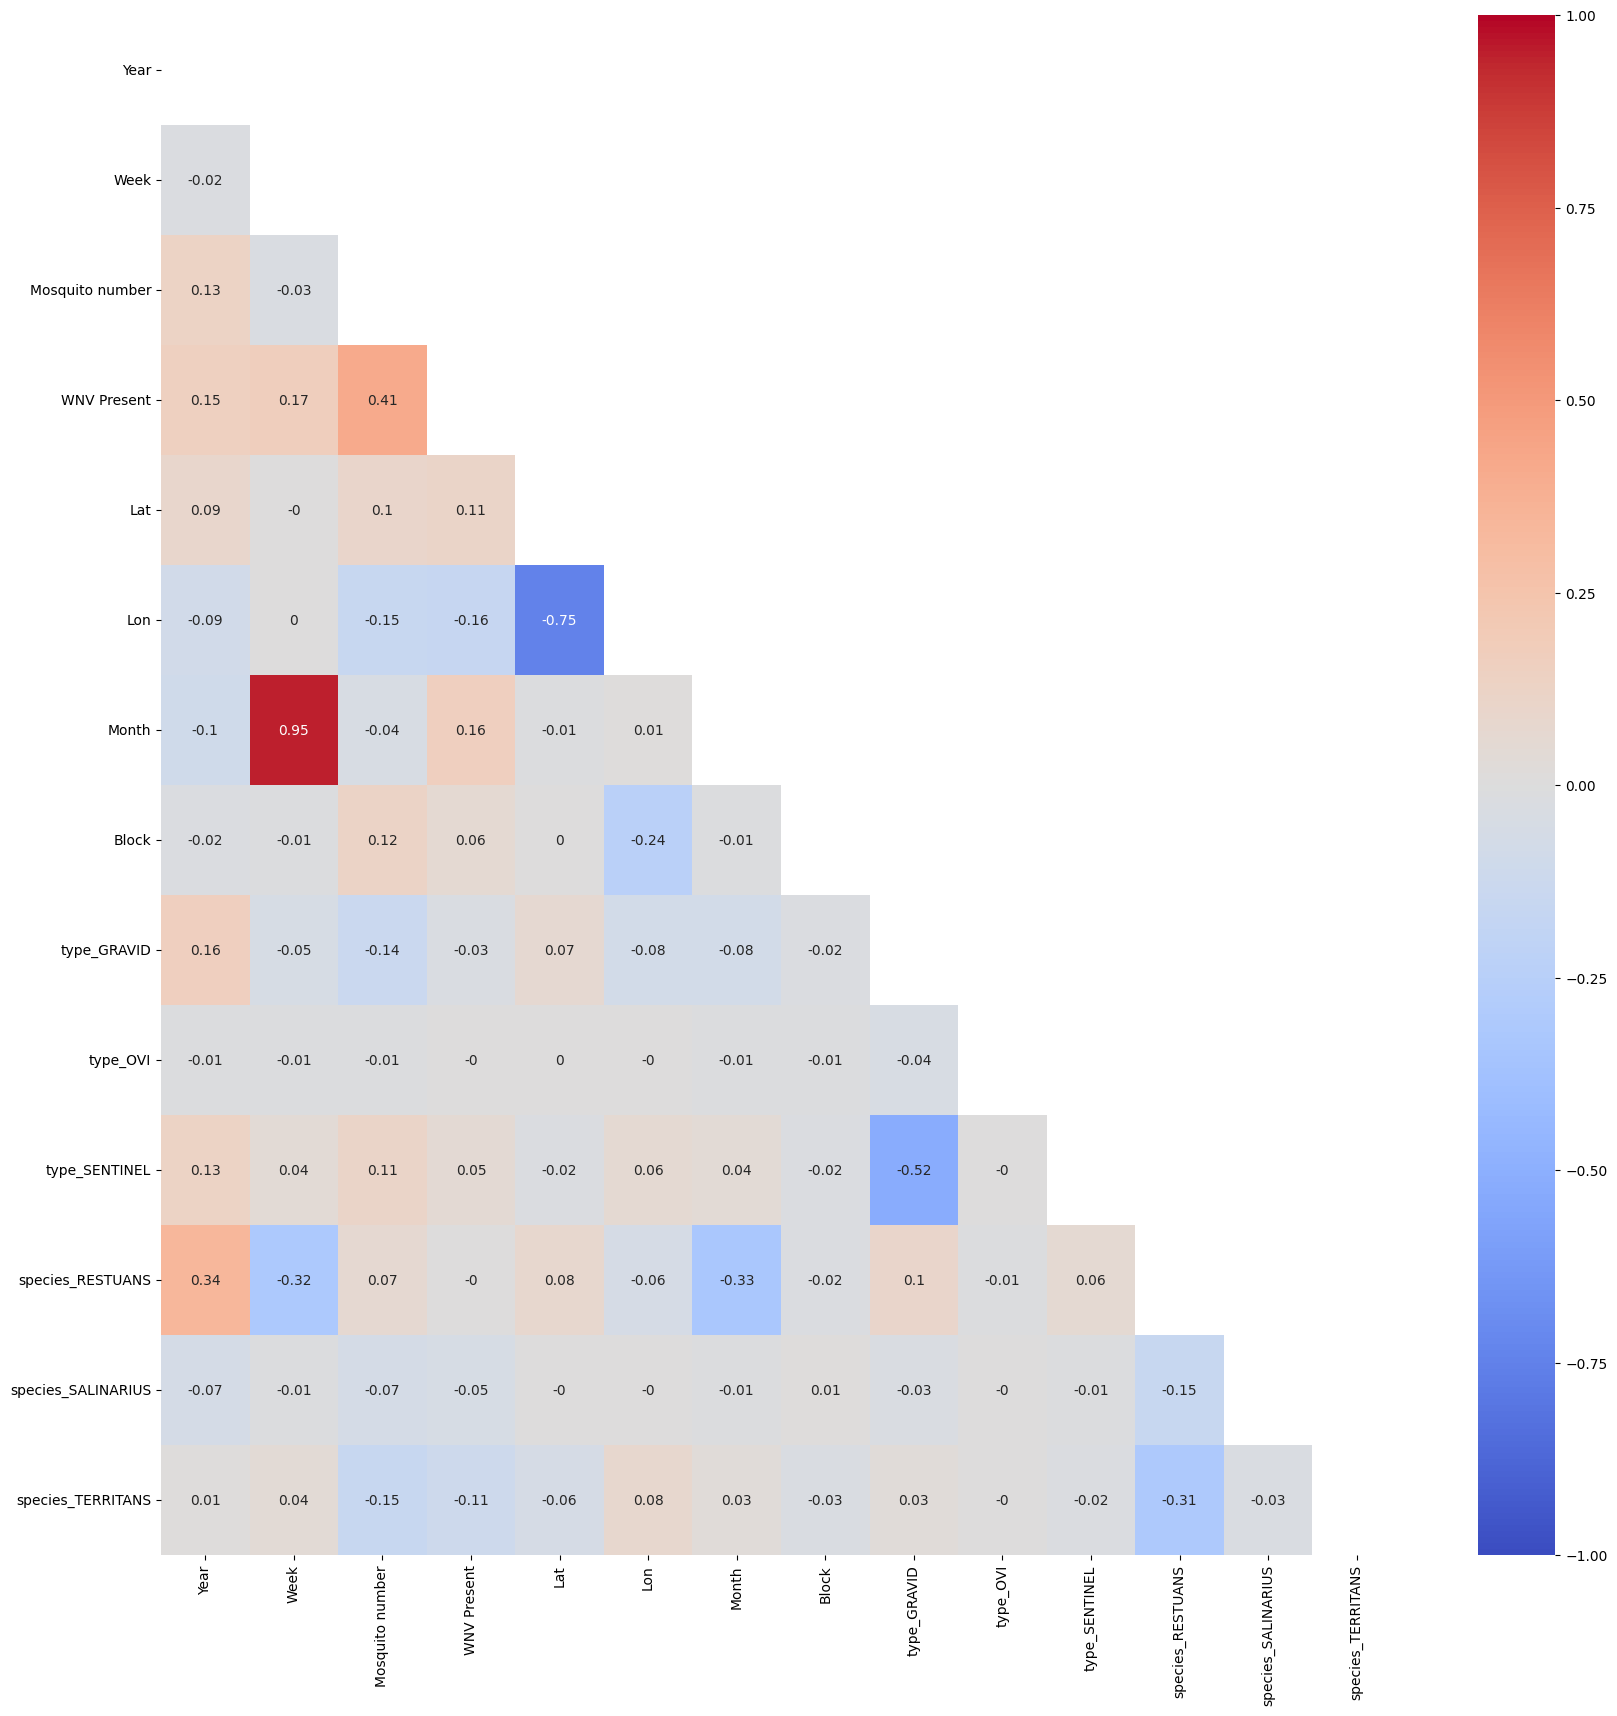

In [99]:
# Mask for upper-triangular to avoid redundant visual information:
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()

Now we can see which columns are postively or negatively correlated with the number of mosquitoes caught. First let's do this by looking at the heatmap; then we do it through a sorted list of numbers:

* By eyeballing the heatmap above, we can see that `WNV present` is fairly postively correlated with `Mosquito number` (40.8%). This confirms the intuition that as the number of mosquitos increase, more instances of the WNV is detected because more infected mosquitos will likely be in the sample. Other notable, but not as significant, postive correlations concern `Year` (12.2%) and `Block` (12.1%).

* Some notable columns that are negatively correlated with `Mosquito number` are `Lon` (-15.1%), `species_TERRITANS` (-15%) and `type_GRAVID` (-13.8%). This means that, for instance, as longitude raises, less mosquitos are present. Also, the fact that the mosquitoe species `TERRITANS` and the trap type `GRAVID` display negative correlations with `Mosquito number` indicates that the `TERRITANS` type have been less in numbers, or less trapped, and the `GRAVID` type trap has caught less mosquitoes. 

We can see the actual correlation percentage for all the otehr columns with `Mosquito number`, as follows:

In [48]:
corr_df['Mosquito number'].sort_values(ascending=False)

Mosquito number       1.000000
WNV Present           0.408034
Year                  0.129326
Block                 0.121259
type_SENTINEL         0.108575
Lat                   0.096820
species_RESTUANS      0.070999
type_OVI             -0.005392
Week                 -0.033900
Month                -0.040426
species_SALINARIUS   -0.072859
type_GRAVID          -0.138275
species_TERRITANS    -0.150962
Lon                  -0.151421
Name: Mosquito number, dtype: float64

Now to assess if the correlation between columns with `Mosquito number` is statistically significant, we run Perason's correlation test for each of those columns and `Mosquito number`. For each of these, the null and alternative hypotheses are as follows:

- $H_0:$ The correlation between the column and `Mosquito number` is zero ($\rho=0$)
- $H_1:$ The correlation is not zero

In [102]:
df2.columns

Index(['Year', 'Week', 'Mosquito number', 'WNV Present', 'Lat', 'Lon', 'Month',
       'Block', 'type_GRAVID', 'type_OVI', 'type_SENTINEL', 'species_RESTUANS',
       'species_SALINARIUS', 'species_TERRITANS'],
      dtype='object')

We just loop through the list of all columns and compare them to `Mosquito number`:

In [101]:
for col in df2.columns:
    tval,p = pearsonr(df2['Mosquito number'], df2[col])
    # print the test results only for those that don't have small-emough p-values
    if p>.05:
        print("The Pearson Correlation test result for {} and Mosquito number: T={:4.3f}, p={:4.3f}".format(col,tval,p))
        print('')

The Pearson Correlation test result for type_OVI and Mosquito number: T=-0.005, p=0.463



This means that the only column whose correlation with `Mosquito number` is **NOT** statistically signiifcant is `type_OVI`, which, as we recall, is a type of trap.

# Part 3 - Advanced Statistical Analysis <a class ='author' id='part-3'></a>

## 3.1. Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

Note: You will likely see a low R^2 value, that is to be expected.
This dataset does not respond well to performing VIF analysis, so this is not required.

`WNV Present` must not be one of your independent variables.


In [53]:
df2.head()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,Block,type_GRAVID,type_OVI,type_SENTINEL,species_RESTUANS,species_SALINARIUS,species_TERRITANS
0,2019,39,2,0,41.977738,-87.880969,9,100,1,0,0,1,0,0
1,2019,39,1,0,41.798211,-87.736925,9,52,1,0,0,1,0,0
2,2019,39,2,0,41.987245,-87.689417,9,58,1,0,0,1,0,0
3,2019,39,1,0,41.953664,-87.724987,9,39,1,0,0,1,0,0
4,2019,39,9,0,41.657069,-87.546049,9,131,1,0,0,1,0,0


In [103]:
X = df2.drop(['Mosquito number','WNV Present'],axis=1)  #independent variables
y = df2['Mosquito number']   #dependent variable

In [104]:
# In order to use the sm library, we need to add constants to the original X table:
x_with_constant = sm.add_constant(X)

In [105]:
# We now instantiate and fit a linear model to our augmented table of independent variables
linear_model = sm.OLS(y,x_with_constant)
result = linear_model.fit()

In [128]:
# We can now check for the model's statistics:

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     169.0
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:59:31   Log-Likelihood:                -73382.
No. Observations:               18495   AIC:                         1.468e+05
Df Residuals:                   18482   BIC:                         1.469e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2594.7699    116.274    -22.316      0.000   -2822.677   -2366.863
Year                   0.5382      0.029     18.657      0.000       0.482       0.595
Week                  -0.0642      0.071     -0.900      0.368      -0.204       0.076
Lat                   -0.8730      1.283     -0.681      0.496      -3.388       1.641
Lon                  -17.9400      1.604    -11.184      0.000     -21.084     -14.796
Month                 -0.3692      0.310     -1.192      0.233      -0.976       0.238
Block                  0.0315      0.003     11.445      0.000       0.026       0.037
type_GRAVID          -10.7764      0.581    -18.533      0.000     -11.916      -9.637
type_OVI             -18.8484     12.811     -1.471      0.141     -43.959       6.263
type_SENTINEL          2.2096      1.079      2.047      0.041       0.094       4.325
species_RESTUANS      -1.2130      0.239     -5.078      0.000      -1.681      -0.745
species_SALINARIUS    -9.7622      0.871    -11.211      0.000     -11.469      -8.056
species_TERRITANS     -9.2097      0.464    -19.866      0.000     -10.118      -8.301
==============================================================================
Omnibus:                     4467.640   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8767.462
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                       4.589   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# Here's the full-digited R-Square
result.rsquared

0.09889781420450494

#### How do we interpret these results?

Firstly, we can say that the equation of the model is

$$ y = -2594.7699 + 0.5382 \,\text{Year} - 0.0642 \,\text{Week} -0.8730 \,\text{Lat} + ... -9.2097 \,\text{species_TERRITANS} $$

This means that:
* For one unit increase in `Year`, there is a 0.5382 increase in the number of mosquitos.
* For one unit increase in `Week`, there is a 0.0642 decrease in the number of mosquitos.
* And so on...

The $R^2$ value of 0.098 means that approximately 9.8% of the variance in the dependent variable can be explained by the independent variables included in the model. The remaining of the variance is unexplained by the model.

Based on the p-values associated with every variable, we can see that `Lat`, `Week` and `Month`, `type_OVI` don't seem significant in predicting the number of mosquitios (p-values are > 0.05). Therefore, based on the p-values, we may consider dropping these columns from the model. **However**, it is important to note that the decision to drop or keep variables should not be based solely on statistical significance. The high p-values might have to do with multicolinearity involved between these variables.

In fact looking at our heatmap below, it's clear that some variables are coorrelated (e.g., `Week` and `Month`, as well as `Lan` and `Lon`, and ), which contribute to multicolinearity. We examine each pair 

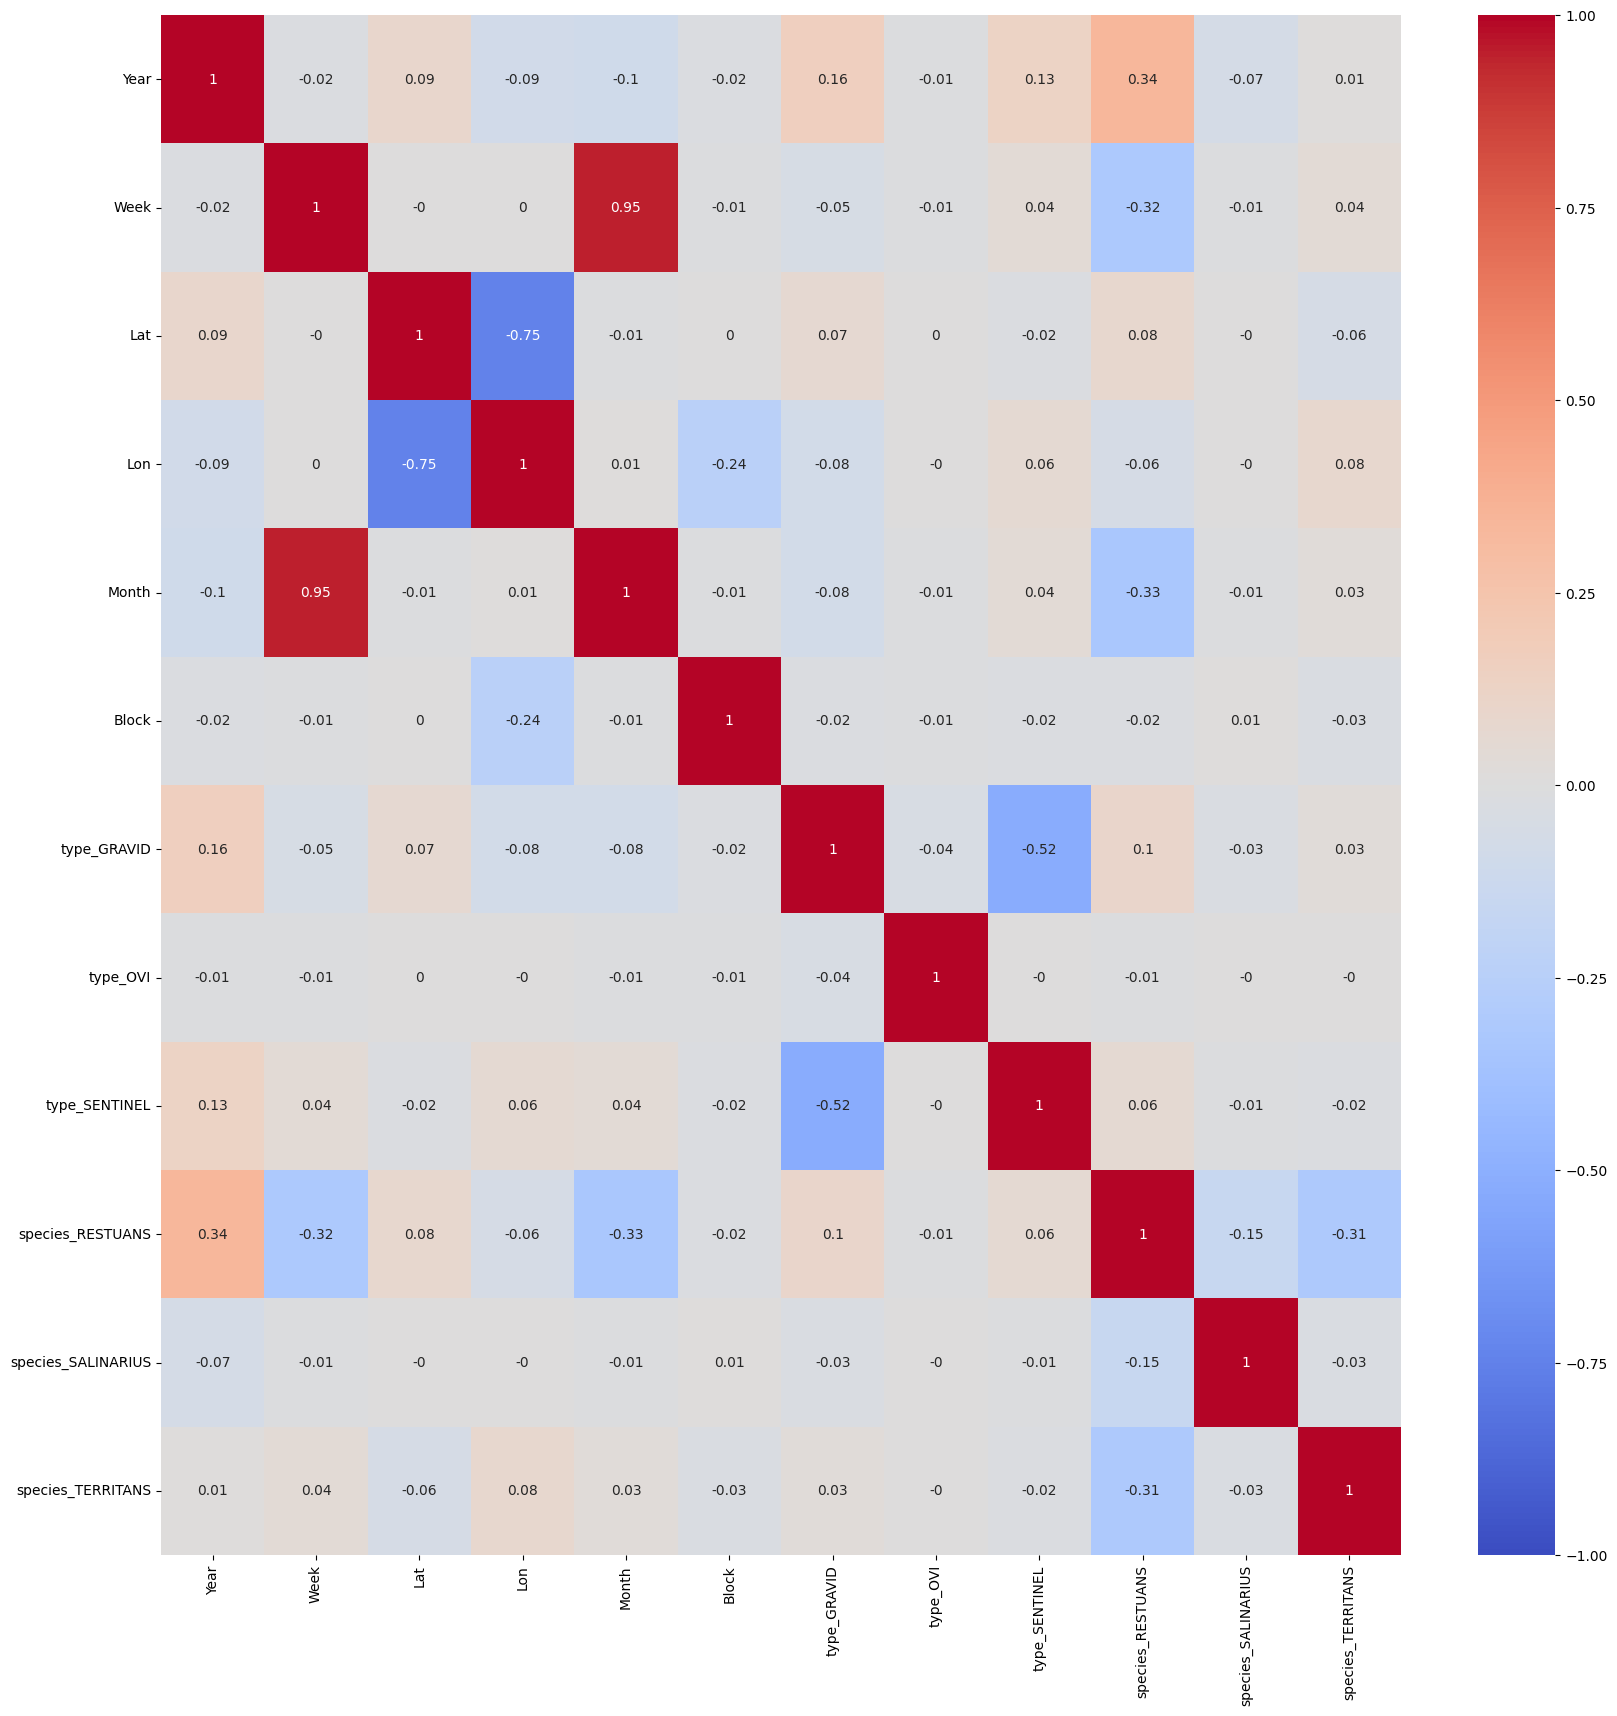

In [108]:
# First let's create a copy of our dataframe df2 where 'Mosquito number' and 'WNV Present' are dropped:

df2_transformed = df2.drop(['Mosquito number','WNV Present'],axis=1)

# Now let's plot the heatmap:

plt.figure(figsize=(20,20))
sns.heatmap(df2_transformed.corr().round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', center=0)
plt.show()

This clearly suggests that `Week` and `Month` are linearly corelated, which implies that there is a multicolinearity involved between whenever these two columns are involved. Similarly, `species_RESTUANS` seems multiply colinearly related with `Week` and `Month`.

For now, I drop one of `Week` of `Month`. Let's see if dropping either will improve the performance of the model:

First, I drop `Month`:

In [129]:
X_2 = df2.drop(['Mosquito number','WNV Present','Month'],axis=1)
y_2 = df2['Mosquito number']

In [130]:
x2_with_constant = sm.add_constant(X_2)
linear_model = sm.OLS(y_2,x2_with_constant)
result2 = linear_model.fit()

In [132]:
result2.rsquared

0.09882848095444907

As we can see, the $R^2$ of the new model has improve slighlty (by 0.00007) compared to the $R^2$ before droppoing `Month` (i.e.. 0.09889781420450494). We get a simliar result if we drop `Week`:

In [133]:
X_3 = df2.drop(['Mosquito number','WNV Present','Week'],axis=1)  #independent variables
y_3 = df2['Mosquito number']   #dependent variable

In [134]:
x3_with_constant = sm.add_constant(X_3)
linear_model = sm.OLS(y_3,x3_with_constant)
result3 = linear_model.fit()

In [150]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     184.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:10   Log-Likelihood:                -73383.
No. Observations:               18495   AIC:                         1.468e+05
Df Residuals:                   18483   BIC:                         1.469e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2582.7192    115.500    -22.361      0.000   -2809.109   -2356.329
Year                   0.5323      0.028     18.950      0.000       0.477       0.587
Lat                   -0.8777      1.283     -0.684      0.494      -3.392       1.637
Lon                  -17.9410      1.604    -11.185      0.000     -21.085     -14.797
Month                 -0.6328      0.101     -6.294      0.000      -0.830      -0.436
Block                  0.0315      0.003     11.459      0.000       0.026       0.037
type_GRAVID          -10.8137      0.580    -18.644      0.000     -11.951      -9.677
type_OVI             -18.8175     12.811     -1.469      0.142     -43.928       6.293
type_SENTINEL          2.1698      1.078      2.012      0.044       0.056       4.283
species_RESTUANS      -1.1902      0.238     -5.010      0.000      -1.656      -0.725
species_SALINARIUS    -9.7570      0.871    -11.206      0.000     -11.464      -8.050
species_TERRITANS     -9.2003      0.463    -19.851      0.000     -10.109      -8.292
==============================================================================
Omnibus:                     4468.311   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8769.954
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                       4.589   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
result3.rsquared

0.09885830956021335

Since the $R^2$ of the model is fairly the same after dropping `Week` or `Month`, we'll drop the one with the lower variance. As the following code shows, that's `Month`.

In [147]:
df2[['Week', 'Month']].describe()

,Week,Month
count,18495.000000,18495.000000
mean,31.004001,7.627088
std,4.332020,0.998079
min,20.000000,5.000000
25%,28.000000,7.000000
50%,31.000000,8.000000
75%,34.000000,8.000000
max,40.000000,10.000000


We also see that `Lat` has a fairly high p-value, so it's likely in a mulitlinear relationship with one or more variables. Looking at our heatmap again, we see that `Lat` and `Lon` are highly negatively correlated. We can also see this through the following code snippet:

In [116]:
stats.pearsonr(df2['Lat'],df2['Lon'])

PearsonRResult(statistic=-0.7494158412588766, pvalue=0.0)

In [151]:
df2[['Lat', 'Lon']].describe()

,Lat,Lon
count,18495.000000,18495.000000
mean,41.852599,-87.712611
std,0.115419,0.095409
min,41.644720,-87.880969
25%,41.754148,-87.778235
50%,41.872873,-87.703105
75%,41.970102,-87.643076
max,42.017801,-87.531051


#### Let's see if dropping either of them will improve the model's performance:

In [148]:
X_4 = df2.drop(['Month','Lon','WNV Present'],axis=1)  #independent variables
y_4 = df2['Mosquito number']   #dependent variable

In [149]:
x4_with_constant = sm.add_constant(X_4)
linear_model = sm.OLS(y_4,x4_with_constant)
result4 = linear_model.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.308e+29
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:31:41   Log-Likelihood:             4.9287e+05
No. Observations:               18495   AIC:                        -9.857e+05
Df Residuals:                   18483   BIC:                        -9.856e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.392e-12   5.24e-12     -0.838      0.402   -1.47e-11    5.88e-12
Year                1.741e-15   1.44e-15      1.209      0.227   -1.08e-15    4.56e-15
Week                3.254e-16   1.17e-15      0.278      0.781   -1.97e-15    2.62e-15
Mosquito number        1.0000   3.72e-16   2.69e+15      0.000       1.000       1.000
Lon                -2.526e-15   5.23e-14     -0.048      0.961   -1.05e-13       1e-13
Block              -2.123e-16   1.34e-16     -1.582      0.114   -4.75e-16    5.07e-17
type_GRAVID          1.49e-15   2.96e-14      0.050      0.960   -5.64e-14    5.94e-14
type_OVI           -2.214e-15   6.47e-13     -0.003      0.997   -1.27e-12    1.27e-12
type_SENTINEL       4.385e-15   5.45e-14      0.081      0.936   -1.02e-13    1.11e-13
species_RESTUANS    4.198e-16   1.21e-14      0.035      0.972   -2.32e-14    2.41e-14
species_SALINARIUS  2.421e-15   4.41e-14      0.055      0.956   -8.41e-14    8.89e-14
species_TERRITANS   1.645e-15   2.37e-14      0.070      0.945   -4.47e-14     4.8e-14
==============================================================================
Omnibus:                     3238.301   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5252.583
Skew:                          -1.212   Prob(JB):                         0.00
Kurtosis:                       3.968   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This shows a radical improvement in the model's performance. The other way around (dropping `Lon` in favor of `Lat`) suggests the same. On the other hand, after dropping either of `Lan` or `Lon`, the p-values of many of the variables become much larger, suggesting that they're insignificant. This could mean that either that each of these is a confounding variables or involved in a multiple colinearity with several other variables. Since we don't know at this point, we leave them both in.

We can run similar tests for the remaining correlated items to determine if any of them should be dropped.

## 3.2. Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note: Mosquito number should be one of your independent variables.

In [153]:
df2.head()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,Block,type_GRAVID,type_OVI,type_SENTINEL,species_RESTUANS,species_SALINARIUS,species_TERRITANS
0,2019,39,2,0,41.977738,-87.880969,9,100,1,0,0,1,0,0
1,2019,39,1,0,41.798211,-87.736925,9,52,1,0,0,1,0,0
2,2019,39,2,0,41.987245,-87.689417,9,58,1,0,0,1,0,0
3,2019,39,1,0,41.953664,-87.724987,9,39,1,0,0,1,0,0
4,2019,39,9,0,41.657069,-87.546049,9,131,1,0,0,1,0,0


The model construction process is fairly similar to the case of linear regression, where we select our dependent and independant variables, add consgtants to the matrix of independent variables, and fit the data to our model created by the sm library.

In [154]:
X = df2.drop(['WNV Present'],axis=1)
y = df2['WNV Present']

In [155]:
X_withconstant = sm.add_constant(X)

In [170]:
# Fitting the model 

# 1. Instantiate model
mylogreg = sm.Logit(y,X_withconstant)

# 2. Fit model
mylogreg = mylogreg.fit()

# Look at summary
mylogreg.summary()

         Current function value: 0.405247
         Iterations: 35


C:\Users\mathe\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18481
Method:                           MLE   Df Model:                           13
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.2233
Time:                        07:13:20   Log-Likelihood:                -7495.0
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -543.7387     27.109    -20.057      0.000    -596.872    -490.605
Year                   0.1128      0.007     16.418      0.000       0.099       0.126
Week                   0.0994      0.016      6.192      0.000       0.068       0.131
Mosquito number        0.0654      0.001     44.712      0.000       0.063       0.068
Lat                   -0.8573      0.296     -2.899      0.004      -1.437      -0.278
Lon                   -3.9410      0.367    -10.736      0.000      -4.660      -3.222
Month                  0.2224      0.069      3.223      0.001       0.087       0.358
Block                 -0.0017      0.001     -2.686      0.007      -0.003      -0.000
type_GRAVID            0.1284      0.132      0.976      0.329      -0.130       0.386
type_OVI             -13.9253   6894.474     -0.002      0.998   -1.35e+04    1.35e+04
type_SENTINEL         -0.2567      0.214     -1.200      0.230      -0.676       0.163
species_RESTUANS      -0.2524      0.051     -4.915      0.000      -0.353      -0.152
species_SALINARIUS    -0.9850      0.322     -3.061      0.002      -1.616      -0.354
species_TERRITANS     -2.4927      0.274     -9.082      0.000      -3.031      -1.955
======================================================================================
"""

In [157]:
mylogreg_loans_results.params

const                -543.738691
Year                    0.112768
Week                    0.099394
Mosquito number         0.065426
Lat                    -0.857322
Lon                    -3.941028
Month                   0.222391
Block                  -0.001704
type_GRAVID             0.128432
type_OVI              -13.925309
type_SENTINEL          -0.256729
species_RESTUANS       -0.252352
species_SALINARIUS     -0.985049
species_TERRITANS      -2.492662
dtype: float64

#### Here's how we interpret the results of the summary table:

Our model now becomes

$$ s(X) = P(y|X) = \frac{1}{1+e^{-(-543.738691 + 0.035 \text{Year} + 0.099394 \text{Week} + ... -2.492662 \text{species_TERRITANS})}}$$

Let's store our parameters in variables so we can interpret them.

In [168]:
beta0 = mylogreg_loans_results.params[0]
beta1 = mylogreg_loans_results.params[1]
beta2 = mylogreg_loans_results.params[2]
beta3 = mylogreg_loans_results.params[3]
beta4 = mylogreg_loans_results.params[4]
beta5 = mylogreg_loans_results.params[5]
beta6 = mylogreg_loans_results.params[6]
beta7 = mylogreg_loans_results.params[7]
beta8 = mylogreg_loans_results.params[8]
beta9 = mylogreg_loans_results.params[9]
beta10 = mylogreg_loans_results.params[10]
beta11 = mylogreg_loans_results.params[11]
beta12 = mylogreg_loans_results.params[12]
beta13 = mylogreg_loans_results.params[13]

We can calculate an *odds ratio* by taking the exponential function of the calculated parameter values (coefficients).

* For the constant term (intercept)
$$\text{odds ratio} = e^{-543.738691} \approx 7.2 e-237 $$

In [167]:
np.exp(beta0)

7.199246082231677e-237

* For our first independent variable, credit score, 

$$\text{odds ratio} = e^{0.112768} \approx 1.2 $$

This means that with one unit increase in Year, the odds of the virus being present increase by a factor of 1.2.

In [169]:
np.exp(beta1)

1.1193720063723054

A similar interpretation can be offered for the other intercepts.